<a href="https://colab.research.google.com/github/AikkiZafire/AikkiZafire.github.io/blob/main/IAT460_A2_Implement_a_Rule_Based_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IAT460 - Assignment 2

##Importing Tools

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import LineCollection
import time

##Code

In [22]:
class LSystemArt:
    def __init__(self, name, axiom, rules, angle):
        self.name = name
        self.axiom = axiom
        self.rules = rules
        self.angle_rad = np.deg2rad(angle)
        self.result_string = axiom # Starts as just the axiom

    # ==========================================
    # TURTLE LOGIC FOR BRANCHING TREE
    # ==========================================
    def grow(self, iterations, show_logic=False):

        # Expands the axiom based on the rules

        # Prints the expanded rule
        if show_logic:
            print(f"\n--- Turtle Logic for {self.name} ---")
            print(f"Start (Axiom): {self.result_string}")

        current_string = self.result_string

        for i in range(iterations):
            next_string = ""
            for char in current_string:
                next_string += self.rules.get(char, char)

            current_string = next_string

            if show_logic:
                # It truncate long strings so the console isn't flooded
                display_str = (current_string[:75] + '...') if len(current_string) > 75 else current_string
                print(f"Iteration {i+1}: Length {len(current_string)} | Content: {display_str}")
                time.sleep(0.5)

        self.result_string = current_string
        return self.result_string


    # ==========================================
    # TURTLE LOGIC FOR GEOMETRIC CLOUD
    # ==========================================
    def visualize(self, length=1, randomness=0, color_map='viridis', show_logic=False):

        # Prints the expanded rules
        if show_logic:
            print(f"\n--- Turtle Logic for {self.name} ---")
            print(f"Instruction String: {self.result_string[:20]}...")

        # State Variables
        x, y = 0, 0
        angle = np.pi / 2
        stack = []

        # Storage for Plotting
        lines = []
        colors = []
        widths = []

        step_count = 0
        total_steps = len(self.result_string)

        for char in self.result_string:
            step_count += 1

            # Print logic for the first 10 steps only
            if show_logic and step_count <= 10:
                state_desc = f"Pos:({x:.1f},{y:.1f}) Angle:{np.degrees(angle):.0f}"
                if char == 'F': action = "Draw Forward"
                elif char == '+': action = "Turn Left"
                elif char == '-': action = "Turn Right"
                elif char == '[': action = "SAVE STATE (Push Stack)"
                elif char == ']': action = "RESTORE STATE (Pop Stack)"
                else: action = "Skip"
                print(f"Step {step_count}: Reading '{char}' -> {action} | {state_desc}")

            # --- Drawing the logic ---
            if char in ['F', 'G']:
                noise = np.random.uniform(-randomness, randomness) if randomness > 0 else 0
                x_new = x + length * np.cos(angle + noise)
                y_new = y + length * np.sin(angle + noise)

                lines.append([(x, y), (x_new, y_new)])

                # Color/width
                progress = step_count / total_steps
                colors.append(progress)
                widths.append(max(0.5, 3.0 * (1 - progress)))

                x, y = x_new, y_new

            elif char == '+': angle += self.angle_rad
            elif char == '-': angle -= self.angle_rad
            elif char == '[': stack.append((x, y, angle))
            elif char == ']': x, y, angle = stack.pop()

        # Rendering the image
        if not show_logic: # Don't show the plot if show_logic is True
            fig, ax = plt.subplots(figsize=(10, 10))
            fig.patch.set_facecolor('#202020')
            lc = LineCollection(lines, array=np.array(colors), cmap=color_map, linewidths=widths)
            ax.add_collection(lc)
            ax.autoscale()
            ax.axis('off')
            ax.set_aspect('equal')
            plt.title(f"{self.name}\nIterations: {self.result_string.count('F')//10}+", color='white')
            plt.show()

##Generating the Visualization

###Fractal Tree Visualization


--- Turtle Logic for the generated rules ---
Start (Axiom): X
Iteration 1: Length 18 | Content: F-[[X]+X]+F[+FX]-X
Iteration 2: Length 89 | Content: FF-[[F-[[X]+X]+F[+FX]-X]+F-[[X]+X]+F[+FX]-X]+FF[+FFF-[[X]+X]+F[+FX]-X]-F-[[...
Iteration 3: Length 379 | Content: FFFF-[[FF-[[F-[[X]+X]+F[+FX]-X]+F-[[X]+X]+F[+FX]-X]+FF[+FFF-[[X]+X]+F[+FX]-...

>>> Generating an Organic Fractal Tree


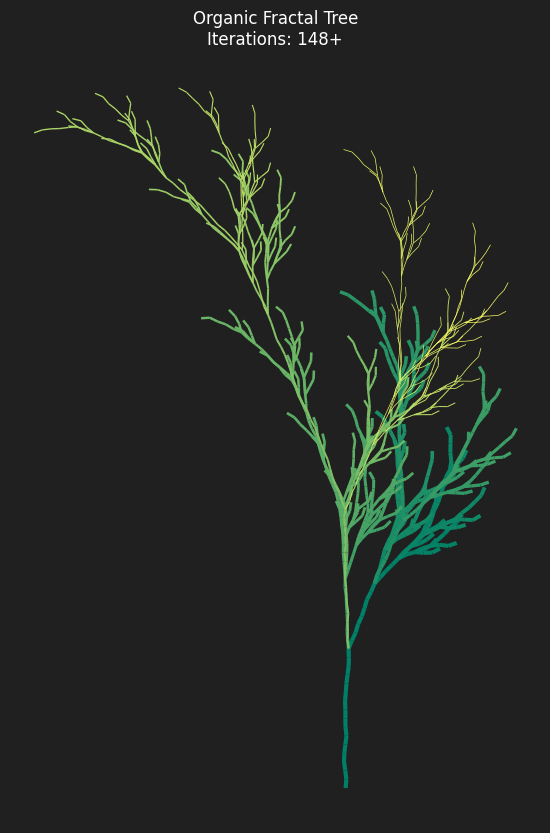

In [23]:
if __name__ == "__main__":

  logic_system = LSystemArt(
        name="the generated rules",
        axiom="X",
        rules={"X": "F-[[X]+X]+F[+FX]-X", "F": "FF"},
        angle=25
  )

  # Shows the generated rules for each interation
  logic_system.grow(iterations=3, show_logic=True)


  # Artwork 1: The Organic Tree
  print("")
  print(">>> Generating an Organic Fractal Tree")
  tree = LSystemArt(
      "Organic Fractal Tree",
      "X",
      {"X": "F-[[X]+X]+F[+FX]-X","F": "FF"},
      22.5
    )
  tree.grow(iterations=5)
  tree.visualize(randomness=0.15, color_map='summer')

###Geometric Clouds Visualization


--- Turtle Logic for the generated rules ---
Instruction String: FFFF-[[FF-[[F-[[X]+X...
Step 1: Reading 'F' -> Draw Forward | Pos:(0.0,0.0) Angle:90
Step 2: Reading 'F' -> Draw Forward | Pos:(0.0,1.0) Angle:90
Step 3: Reading 'F' -> Draw Forward | Pos:(0.0,2.0) Angle:90
Step 4: Reading 'F' -> Draw Forward | Pos:(0.0,3.0) Angle:90
Step 5: Reading '-' -> Turn Right | Pos:(0.0,4.0) Angle:90
Step 6: Reading '[' -> SAVE STATE (Push Stack) | Pos:(0.0,4.0) Angle:65
Step 7: Reading '[' -> SAVE STATE (Push Stack) | Pos:(0.0,4.0) Angle:65
Step 8: Reading 'F' -> Draw Forward | Pos:(0.0,4.0) Angle:65
Step 9: Reading 'F' -> Draw Forward | Pos:(0.4,4.9) Angle:65
Step 10: Reading '-' -> Turn Right | Pos:(0.8,5.8) Angle:65

Generating Crystal Pattern Geometric Cloud


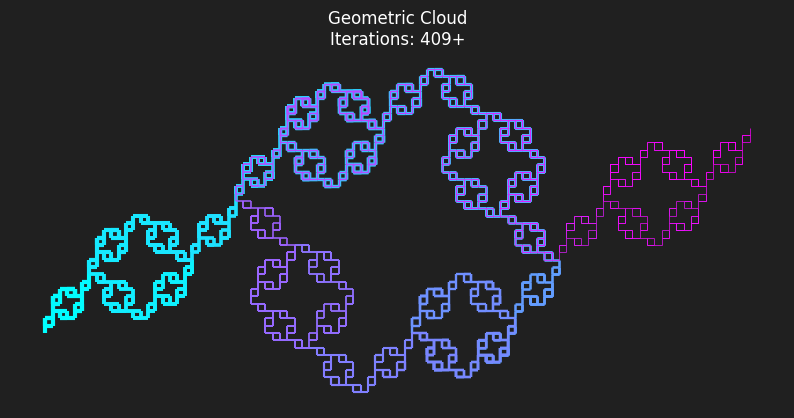

In [24]:
if __name__ == "__main__":

  # Show the Turtle's thinking when it's creating the geometric cloud
  logic_system.visualize(show_logic=True)

  # Artwork 2: Geometric Cloud

  print("")
  print("Generating Crystal Pattern Geometric Cloud")
  geometric_cloud = LSystemArt(
      "Geometric Cloud",
      "F",
      {"F": "FF-F-F-F-F-F+F"},
      90
  )

  geometric_cloud.grow(iterations=4)
  geometric_cloud.visualize(randomness=0, color_map='cool')

### Other 3 Examples


--- Turtle Logic for the generated rules ---
Instruction String: FFFF-[[FF-[[F-[[X]+X...
Step 1: Reading 'F' -> Draw Forward | Pos:(0.0,0.0) Angle:90
Step 2: Reading 'F' -> Draw Forward | Pos:(0.0,1.0) Angle:90
Step 3: Reading 'F' -> Draw Forward | Pos:(0.0,2.0) Angle:90
Step 4: Reading 'F' -> Draw Forward | Pos:(0.0,3.0) Angle:90
Step 5: Reading '-' -> Turn Right | Pos:(0.0,4.0) Angle:90
Step 6: Reading '[' -> SAVE STATE (Push Stack) | Pos:(0.0,4.0) Angle:65
Step 7: Reading '[' -> SAVE STATE (Push Stack) | Pos:(0.0,4.0) Angle:65
Step 8: Reading 'F' -> Draw Forward | Pos:(0.0,4.0) Angle:65
Step 9: Reading 'F' -> Draw Forward | Pos:(0.4,4.9) Angle:65
Step 10: Reading '-' -> Turn Right | Pos:(0.8,5.8) Angle:65

Generating a hexagonal structure that looks like a snowflake


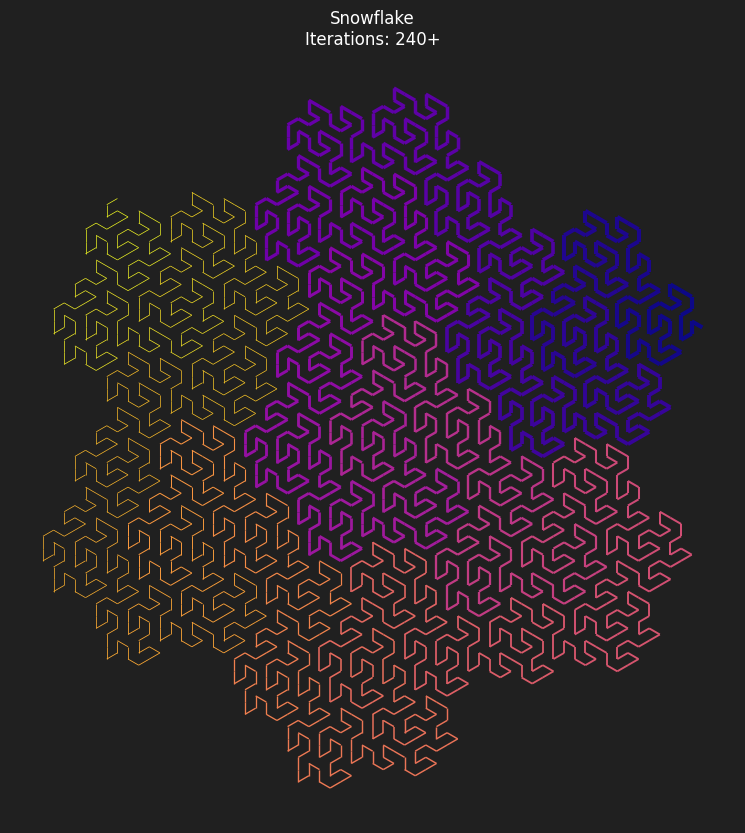

In [26]:
if __name__ == "__main__":

  # Show the Turtle's thinking when it's creating the snowflake structure
  logic_system.visualize(show_logic=True)

  # Artwork 3: Snowflake

  print("")
  print("Generating a hexagonal structure that looks like a snowflake")
  geometric_cloud = LSystemArt(
      "Snowflake",
      "X",
      {"X": "X+YF++YF-FX--FXFX-YF+", "Y": "-FX+YFYF++YF+FX--FX-Y"},
      60
  )

  geometric_cloud.grow(iterations=4)
  geometric_cloud.visualize(randomness=0, color_map='plasma')


--- Turtle Logic for the generated rules ---
Instruction String: FFFF-[[FF-[[F-[[X]+X...
Step 1: Reading 'F' -> Draw Forward | Pos:(0.0,0.0) Angle:90
Step 2: Reading 'F' -> Draw Forward | Pos:(0.0,1.0) Angle:90
Step 3: Reading 'F' -> Draw Forward | Pos:(0.0,2.0) Angle:90
Step 4: Reading 'F' -> Draw Forward | Pos:(0.0,3.0) Angle:90
Step 5: Reading '-' -> Turn Right | Pos:(0.0,4.0) Angle:90
Step 6: Reading '[' -> SAVE STATE (Push Stack) | Pos:(0.0,4.0) Angle:65
Step 7: Reading '[' -> SAVE STATE (Push Stack) | Pos:(0.0,4.0) Angle:65
Step 8: Reading 'F' -> Draw Forward | Pos:(0.0,4.0) Angle:65
Step 9: Reading 'F' -> Draw Forward | Pos:(0.4,4.9) Angle:65
Step 10: Reading '-' -> Turn Right | Pos:(0.8,5.8) Angle:65

Generating a recursive triangular structure


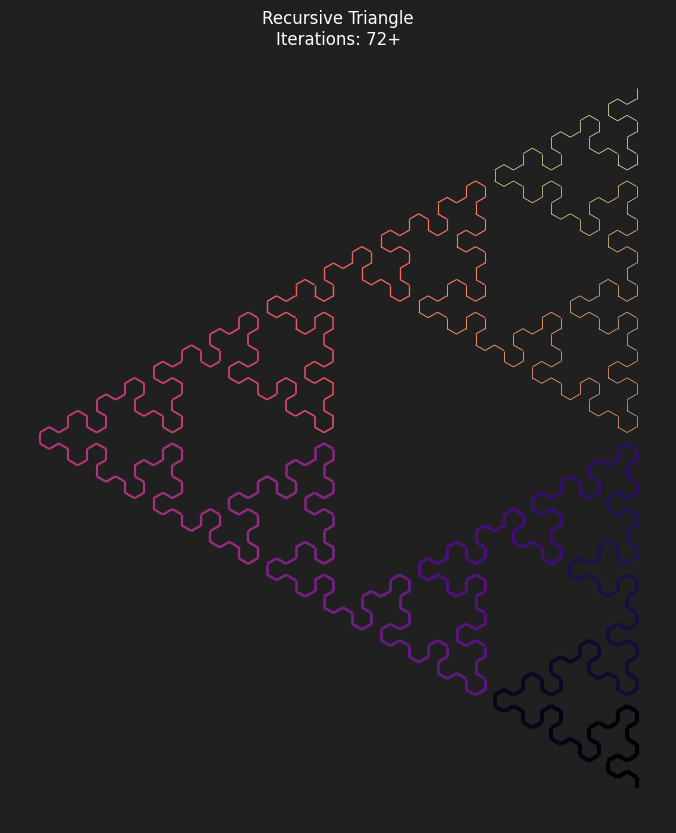

In [27]:
if __name__ == "__main__":

  # Show the Turtle's thinking when it's creating the trianglular structure
  logic_system.visualize(show_logic=True)

  # Artwork 4: Recursive Triangle

  print("")
  print("Generating a recursive triangular structure")
  geometric_cloud = LSystemArt(
      "Recursive Triangle",
      "YF",
      {"X": "YF+XF+Y", "Y": "XF-YF-X"},
      60
  )

  geometric_cloud.grow(iterations=6)
  geometric_cloud.visualize(randomness=0, color_map='magma')


--- Turtle Logic for the generated rules ---
Instruction String: FFFF-[[FF-[[F-[[X]+X...
Step 1: Reading 'F' -> Draw Forward | Pos:(0.0,0.0) Angle:90
Step 2: Reading 'F' -> Draw Forward | Pos:(0.0,1.0) Angle:90
Step 3: Reading 'F' -> Draw Forward | Pos:(0.0,2.0) Angle:90
Step 4: Reading 'F' -> Draw Forward | Pos:(0.0,3.0) Angle:90
Step 5: Reading '-' -> Turn Right | Pos:(0.0,4.0) Angle:90
Step 6: Reading '[' -> SAVE STATE (Push Stack) | Pos:(0.0,4.0) Angle:65
Step 7: Reading '[' -> SAVE STATE (Push Stack) | Pos:(0.0,4.0) Angle:65
Step 8: Reading 'F' -> Draw Forward | Pos:(0.0,4.0) Angle:65
Step 9: Reading 'F' -> Draw Forward | Pos:(0.4,4.9) Angle:65
Step 10: Reading '-' -> Turn Right | Pos:(0.8,5.8) Angle:65

Similar to the Organic Tree, but has more randomness that ended up looking like a coral


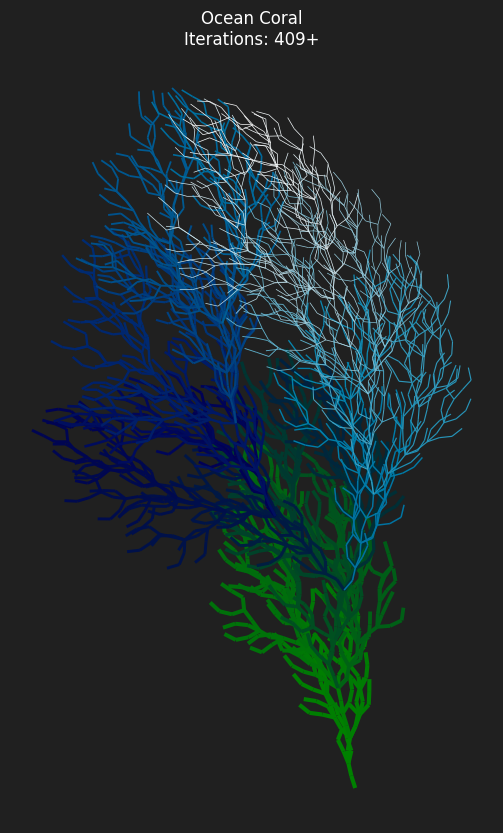

In [28]:
if __name__ == "__main__":

  # Show the Turtle's thinking when it's creating the coral
  logic_system.visualize(show_logic=True)

  # Artwork 5: Ocean Coral

  print("")
  print("Similar to the Organic Tree, but has more randomness that ended up looking like a coral")
  geometric_cloud = LSystemArt(
      "Ocean Coral",
      "F",
      {"F": "FF+[+F-F-F]-[-F+F+F]"},
      22.5
  )

  geometric_cloud.grow(iterations=4)
  geometric_cloud.visualize(randomness=0.4, color_map='ocean')